# 2023 人工智慧 HW1
### 引入套件 先把資料處理要用的套件引入
* 分析
1. Numpy
2. Pandas
3. Scipy
* 視覺化
1. Matplotlib
2. Plotly
3. Seaborn    

In [119]:
import pandas as pd # 載入pandas 套件 命名引用名稱:pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc # 用於之後做T-test
import seaborn as sns
import plotly.express as px

#-----------------------------------------------------------------------------------------------------------
#可以一次顯示出jupyter全部的output
#來自https://stackoverflow.com/questions/36786722/how-to-display-full-output-in-jupyter-not-only-last-result
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#------------------------------------------------------------------------------------------------------------

* ### 讀入資料
* ### 查看前十筆資料看有沒有錯誤
* ### 查看每個 column 的資料型態

In [120]:
rowdata = pd.read_csv('./diabetes.csv')
rowdata.head(10)
rowdata.dtypes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

* ### 查看資料筆數

0    500
1    268
Name: Outcome, dtype: int64

<Axes: ylabel='Outcome'>

Text(0.5, 1.0, 'Outcome')

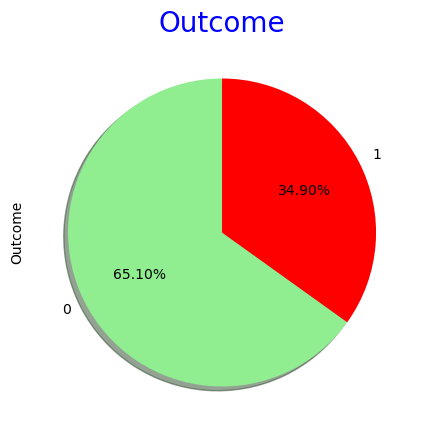

In [121]:
rowdata['Outcome'].value_counts()
colors = ["lightgreen", "red"]
rowdata["Outcome"].value_counts().plot(
    kind="pie", #圖形類別: 圓餅圖
    shadow=True, #圓餅圖要不要有陰影
    startangle=90,#設定圓餅圖角度
    figsize=(5, 5),#設定圖形的大小
    autopct="%1.2f%%",
    colors=colors,
)
plt.title("Outcome", fontsize=20, color="blue")

確認所有Outcome都是1、0，沒有雜訊


* ### 把每一列的資訊圖成畫，觀察每個資料的線型

<Figure size 2000x1000 with 0 Axes>

<Axes: xlabel='Pregnancies', ylabel='Count'>

Text(0.5, 0, 'Pregnancies')

<Axes: xlabel='Glucose', ylabel='Count'>

Text(0.5, 0, 'Glucose')

<Axes: xlabel='BloodPressure', ylabel='Count'>

Text(0.5, 0, 'BloodPressure')

<Axes: xlabel='SkinThickness', ylabel='Count'>

Text(0.5, 0, 'SkinThickness')

<Axes: xlabel='Insulin', ylabel='Count'>

Text(0.5, 0, 'Insulin')

<Axes: xlabel='BMI', ylabel='Count'>

Text(0.5, 0, 'BMI')

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Count'>

Text(0.5, 0, 'DiabetesPedigreeFunction')

<Axes: xlabel='Age', ylabel='Count'>

Text(0.5, 0, 'Age')

<Axes: xlabel='Outcome', ylabel='Count'>

Text(0.5, 0, 'Outcome')

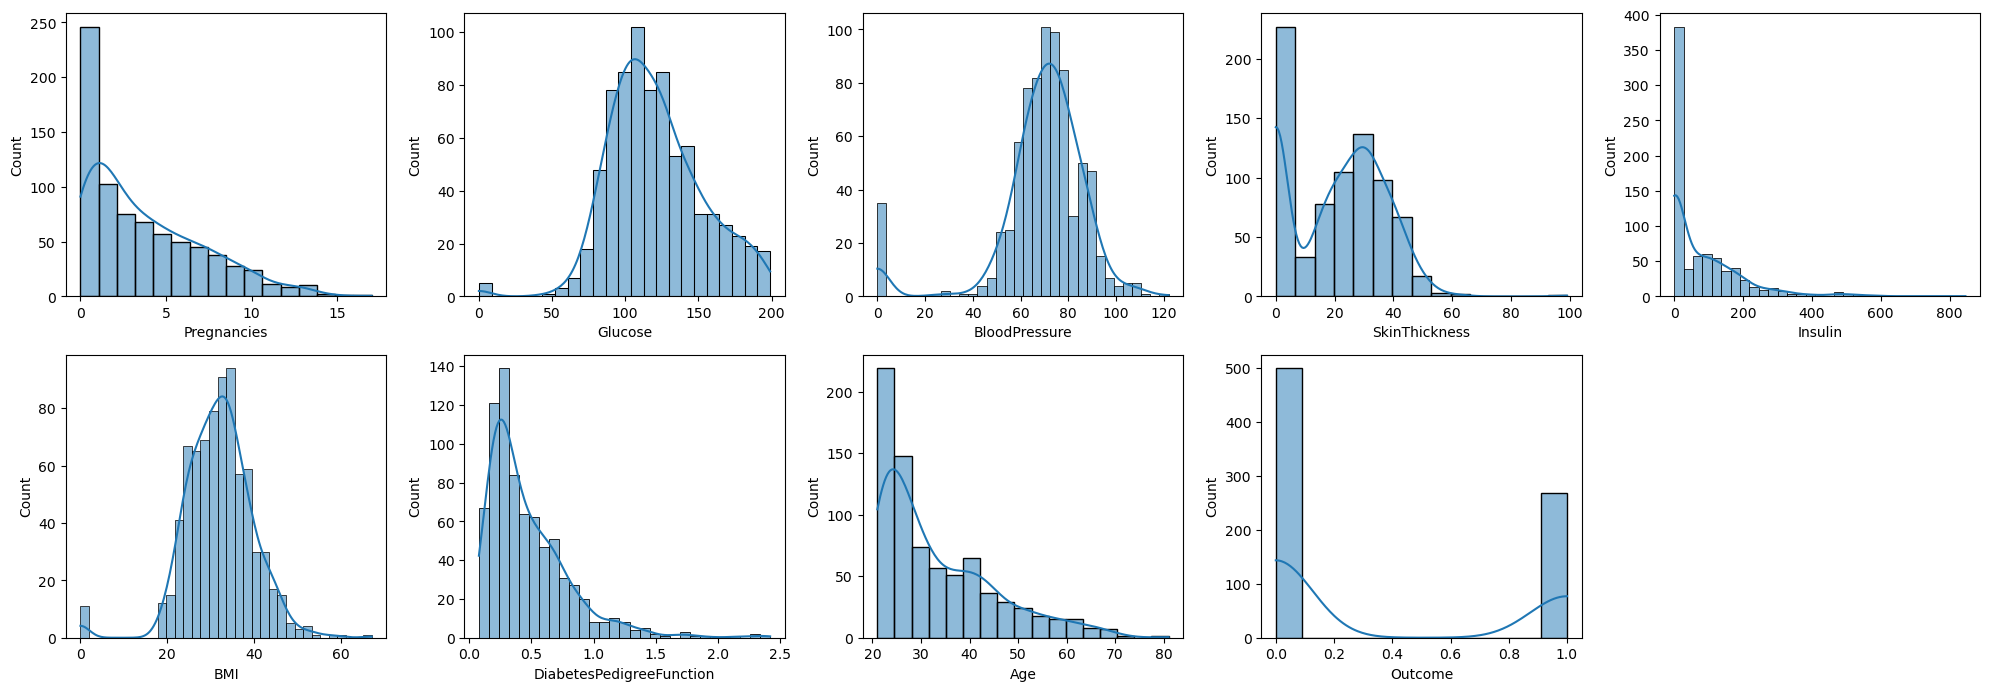

In [122]:
plt.figure(figsize = (20,10))
plot_number = 1
num_cols = [col for col in rowdata.columns if rowdata[col].dtype != 'object'] 
for column in num_cols:
    if plot_number <= 14:
        ax = plt.subplot(3, 5, plot_number)
        sns.histplot(rowdata[column], kde = True)
        plt.xlabel(column)
        
    plot_number += 1

plt.tight_layout()
plt.show()

* ### 藉由小提琴圖觀察：各項指標在有無得病的人群中，有無變化

In [123]:
def violin(col) :
    fig = px.violin(rowdata, y=col, x="Outcome", color="Outcome", box=True, template = 'plotly_dark')
    return fig.show()

for col in num_cols :
    if(col == 'Outcome') :
        continue
    violin(col)

由上面的圖表中可以得知，與是否得病可能有關的是： Pregnancies, Glucose, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age
## 下面進行特微工程
* ### 察看有無缺失值

In [124]:
rowdata.isnull().sum(axis = 0)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

沒有缺失值
* ### 察看資料型態

In [125]:
rowdata.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

* ### 把有無得病的數據分開，方便之後做t-test

In [126]:
#--------------------------------------
#來自https://sparkbyexamples.com/pandas/how-to-split-pandas-dataframe/
grouped = rowdata.groupby('Outcome')
group1 = grouped.get_group(1)
group2 = grouped.get_group(0)
#--------------------------------------

* ### 用t-test檢測，在有無得病的人群中，各項數據是否有顯著差異

In [127]:
#------------------------------------------------------------------------------------------------------------------------------------------------------------
#來自https://peilee-98185.medium.com/t-%E6%AA%A2%E5%AE%9A-with-python-443c2364b071
def t_test(group1, group2):
    mean1 = np.mean(group1)
    mean2 = np.mean(group2)
    std1 = np.std(group1)
    std2 = np.std(group2)
    nobs1 = len(group1)
    nobs2 = len(group2)
    
    modified_std1 = np.sqrt(np.float32(nobs1)/
                    np.float32(nobs1-1)) * std1
    modified_std2 = np.sqrt(np.float32(nobs2)/
                    np.float32(nobs2-1)) * std2
    statistic, pvalue = sc.stats.ttest_ind_from_stats(mean1 = mean1, std1 = modified_std1, nobs1 = nobs1, mean2 = mean2, std2 = modified_std2, nobs2 = nobs2)
    return statistic, pvalue
#--------------------------------------------------------------------------------------------------------------------------------------------------------------
for col in num_cols :
    if(col == 'Outcome') :
        continue
    statistic, pvalue = t_test(group1[col], group2[col])
    print(col, ": \n\tt statistic :", statistic, "\n\tp value :",  pvalue)



Pregnancies : 
	t statistic : 6.298430746308315 
	p value : 5.065121201817035e-10
Glucose : 
	t statistic : 14.600060459545738 
	p value : 8.93538514042515e-43
BloodPressure : 
	t statistic : 1.804702357491721 
	p value : 0.07151389135934565
SkinThickness : 
	t statistic : 2.0747002604862326 
	p value : 0.0383476988615383
Insulin : 
	t statistic : 3.644325504162463 
	p value : 0.00028618633295577955
BMI : 
	t statistic : 8.471840197603148 
	p value : 1.2298050760682617e-16
DiabetesPedigreeFunction : 
	t statistic : 4.885826613108591 
	p value : 1.2546060691080491e-06
Age : 
	t statistic : 6.792688271705752 
	p value : 2.2099725692773062e-11


除了BloodPressure 外，其他的資料在正常人和病人間都有顯著的差異
* ### 區分**特徵欄位**與**預測目標欄位**:

In [129]:
data = rowdata.drop(['Outcome', 'BloodPressure'], axis = 1)
label = rowdata['Outcome']
display(data)

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,35,0,33.6,0.627,50
1,1,85,29,0,26.6,0.351,31
2,8,183,0,0,23.3,0.672,32
3,1,89,23,94,28.1,0.167,21
4,0,137,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...
763,10,101,48,180,32.9,0.171,63
764,2,122,27,0,36.8,0.340,27
765,5,121,23,112,26.2,0.245,30
766,1,126,0,0,30.1,0.349,47
